# **<center>STOCK PRICE PREDICTION Using Regression and Deep Learning Algorithms</center>**

**Discussed Algorithms:**
  1. Support Vector Regressor
  2. Random Forest Regressor
  3. KNN Regressor
  4. LSTM (Long Short-Term Memory)
  5. GRU (Gated Recurrent Unit)


In [53]:
!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings('ignore')

**Data Ingestion**

In [143]:
 df = yf.download("ADANIENT.NS", start="2020-01-01", end="2023-02-12")
 df=df.round(2)

[*********************100%***********************]  1 of 1 completed


**Top 5 rows of dataframe**

In [55]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS
Date,,,,,
2020-01-01,205.83,208.40,204.64,206.97,1553127
2020-01-02,209.14,211.13,205.48,205.98,2991937
2020-01-03,206.27,210.28,203.80,208.20,2512421
2020-01-06,197.61,205.73,195.83,205.73,4353179
2020-01-07,202.06,203.70,198.60,198.60,2966120


**Bottom 5 rows of dataframe**

In [56]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS
Date,,,,,
2023-02-06,1570.50,1612.74,1433.19,1572.79,19308603
2023-02-07,1800.42,1959.95,1523.46,1568.80,19188072
2023-02-08,2161.22,2219.03,1838.27,1867.23,19173006
2023-02-09,1923.00,2164.96,1728.97,2164.96,18279862
2023-02-10,1844.36,1987.21,1730.72,1766.52,11334878


**Shape of the dataframe**

In [57]:
df.shape

(776, 5)

**List of columns in the dataframe**

In [58]:
df.columns

MultiIndex([( 'Close', 'ADANIENT.NS'),
            (  'High', 'ADANIENT.NS'),
            (   'Low', 'ADANIENT.NS'),
            (  'Open', 'ADANIENT.NS'),
            ('Volume', 'ADANIENT.NS')],
           names=['Price', 'Ticker'])

**Checking duplicate**

In [37]:
df.duplicated().sum()

0

**Checking Null**

In [38]:
df.isnull().sum()

Price   Ticker     
Close   ADANIENT.NS    0
High    ADANIENT.NS    0
Low     ADANIENT.NS    0
Open    ADANIENT.NS    0
Volume  ADANIENT.NS    0
dtype: int64

**Basic information about  the dataframe**

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 776 entries, 2020-01-01 to 2023-02-10
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Close, ADANIENT.NS)   776 non-null    float64
 1   (High, ADANIENT.NS)    776 non-null    float64
 2   (Low, ADANIENT.NS)     776 non-null    float64
 3   (Open, ADANIENT.NS)    776 non-null    float64
 4   (Volume, ADANIENT.NS)  776 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 36.4 KB


**Basic statistics of the dataframe**

In [59]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS
count,776.000000,776.000000,776.000000,776.000000,7.760000e+02
mean,1453.849871,1481.708802,1424.461534,1454.854497,4.753229e+06
std,1152.595239,1170.872849,1134.441879,1155.770883,5.389994e+06
min,120.600000,129.480000,116.110000,119.820000,2.482490e+05
25%,311.970000,318.322500,306.252500,311.807500,1.714098e+06
50%,1439.595000,1471.685000,1412.590000,1441.285000,3.077650e+06
75%,2107.597500,2172.277500,2072.497500,2132.132500,5.361654e+06
max,4159.460000,4184.130000,4060.700000,4169.150000,4.926454e+07


**Checking unique and making Date as index to perform our analysis**

In [60]:
df.nunique()
df['Date'] = df.index

In [61]:
df

Price,Close,High,Low,Open,Volume,Date
Ticker,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,
Date,,,,,,
2020-01-01,205.83,208.40,204.64,206.97,1553127,2020-01-01
2020-01-02,209.14,211.13,205.48,205.98,2991937,2020-01-02
2020-01-03,206.27,210.28,203.80,208.20,2512421,2020-01-03
2020-01-06,197.61,205.73,195.83,205.73,4353179,2020-01-06
2020-01-07,202.06,203.70,198.60,198.60,2966120,2020-01-07
...,...,...,...,...,...,...
2023-02-06,1570.50,1612.74,1433.19,1572.79,19308603,2023-02-06
2023-02-07,1800.42,1959.95,1523.46,1568.80,19188072,2023-02-07


**Cheking range of date**

In [62]:
print("Starting date: ",df.iloc[0][-1])
print("Ending date: ", df.iloc[-1][-1])
print("Duration: ", df.iloc[-1][-1]-df.iloc[0][-1])

Starting date:  2020-01-01 00:00:00
Ending date:  2023-02-10 00:00:00
Duration:  1136 days 00:00:00


**Creating monthvise data**

<Figure size 2000x500 with 0 Axes>

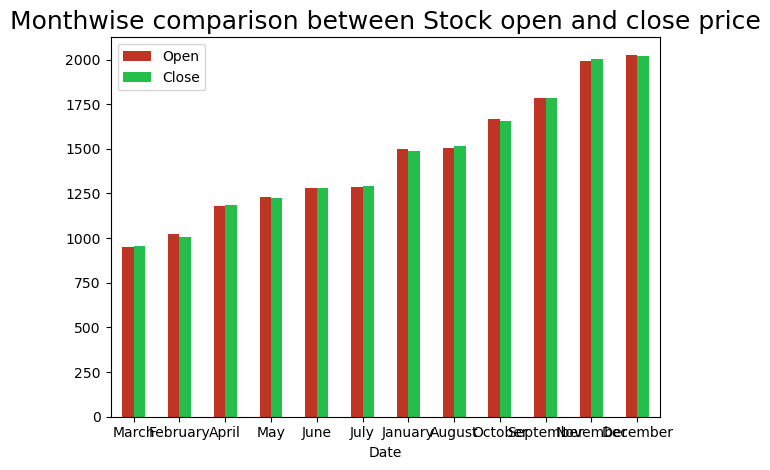

In [63]:
# First, flatten the MultiIndex columns
df.columns = [x[0] for x in df.columns]

# Now create the monthwise analysis
monthvise = (df.groupby(df['Date'].dt.strftime('%B'))
            .agg({'Open': 'mean', 'Close': 'mean'})
            .sort_values(by='Close'))

# Create the plot
plt.figure(figsize=(20,5))
monthvise.plot(kind='bar', rot=0, color={"Open": "#BE3525", "Close":"#25BE4B"})
plt.title("Monthwise comparison between Stock open and close price", fontsize=18)
plt.tight_layout()
plt.show()

In [64]:
monthvise

,Open,Close
Date,,
March,948.909841,953.281746
February,1020.892090,1007.044478
April,1182.153393,1186.672143
May,1232.534500,1227.441667
June,1282.004091,1282.650909
July,1287.646615,1289.300462
January,1498.741429,1487.950595
August,1505.910323,1517.426452
October,1664.861000,1657.446333


**Potting monthvise data**

In [65]:
# First, let's clean up the DataFrame columns
# Convert the data into proper columns
df.columns = ['Price', 'Close', 'High', 'Low', 'Open', 'Volume','Date']

# Make sure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Now create the monthly analysis
monthvise = (df.groupby(df['Date'].dt.strftime('%B'))
            .agg({'Open': 'mean', 'Close': 'mean'})
            .sort_values(by='Close'))

# Import matplotlib if not already imported
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(20,5))
monthvise.plot(kind='bar', rot=0, color={"Open": "#BE3525", "Close":"#25BE4B"})
plt.title("Monthwise comparison between Stock open and close price", fontsize=18)
plt.tight_layout()
plt.show()

ValueError: Length mismatch: Expected axis has 6 elements, new values have 7 elements

In [66]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

**Minimum low price in each month**

In [68]:
df.groupby(df['Date'].dt.strftime('%B'))['Low'].min()

Date
April        127.68
August       170.77
December     394.12
February     213.50
January      192.66
July         144.84
June         140.65
March        116.11
May          126.98
November     332.22
October      295.26
September    256.86
Name: Low, dtype: float64

**Maximum low price in each month**

In [69]:
df.groupby(df['Date'].dt.strftime('%B'))['Low'].max()

Date
April        2332.03
August       3156.57
December     4060.70
February     1938.48
January      3817.19
July         2556.41
June         2203.02
March        1987.36
May          2306.78
November     4016.36
October      3321.44
September    3806.66
Name: Low, dtype: float64

**Minimum high price in each month**

In [70]:
df.groupby(df['Date'].dt.strftime('%B'))['High'].min()

Date
April        134.27
August       178.26
December     422.90
February     222.46
January      201.57
July         149.63
June         148.08
March        129.48
May          135.06
November     343.44
October      311.17
September    280.55
Name: High, dtype: float64

**Maximum high price in each month**

In [71]:
df.groupby(df['Date'].dt.strftime('%B'))['High'].max()

Date
April        2416.53
August       3258.53
December     4184.13
February     3006.53
January      3874.56
July         2618.32
June         2269.85
March        2038.27
May          2358.58
November     4090.26
October      3455.20
September    3879.55
Name: High, dtype: float64

In [72]:
monthvise['monthvise_high']= df.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise['monthvise_low']= df.groupby(df['Date'].dt.strftime('%B'))['Low'].min()

Text(0.5, 1.0, 'Monthwise High and Low stock price')

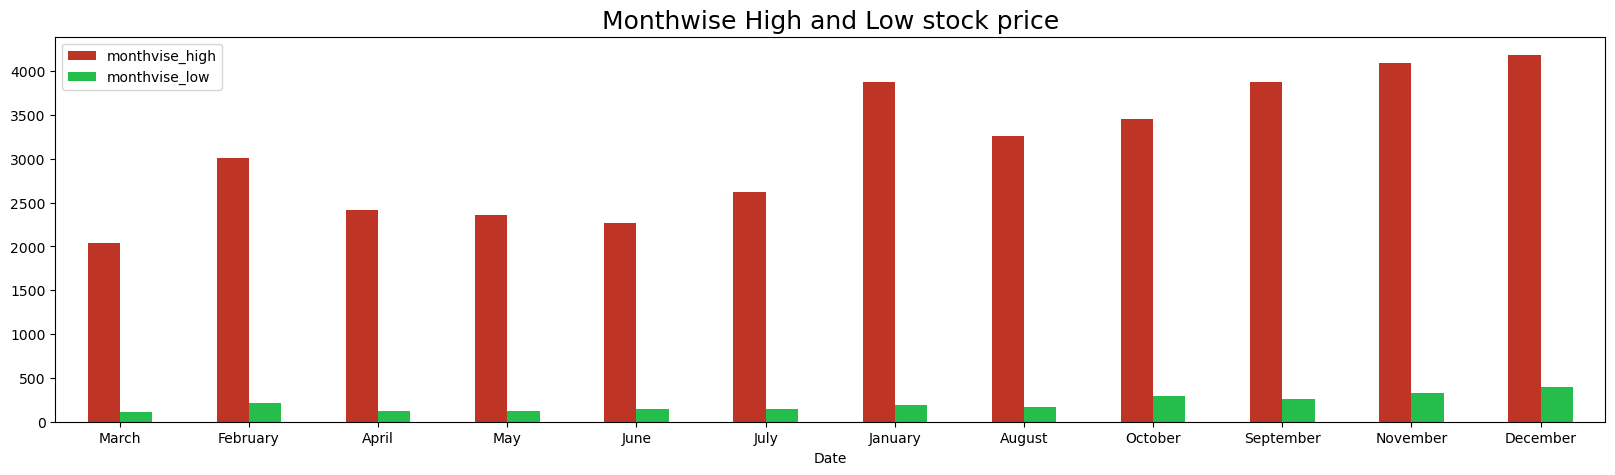

In [73]:
monthvise[['monthvise_high', 'monthvise_low']].plot.bar(rot=0, color={"monthvise_high": "#BE3525", "monthvise_low":"#25BE4B"},figsize=(20,5))
plt.title("Monthwise High and Low stock price", fontsize = 18)

Text(0.5, 1.0, 'Stock analysis chart')

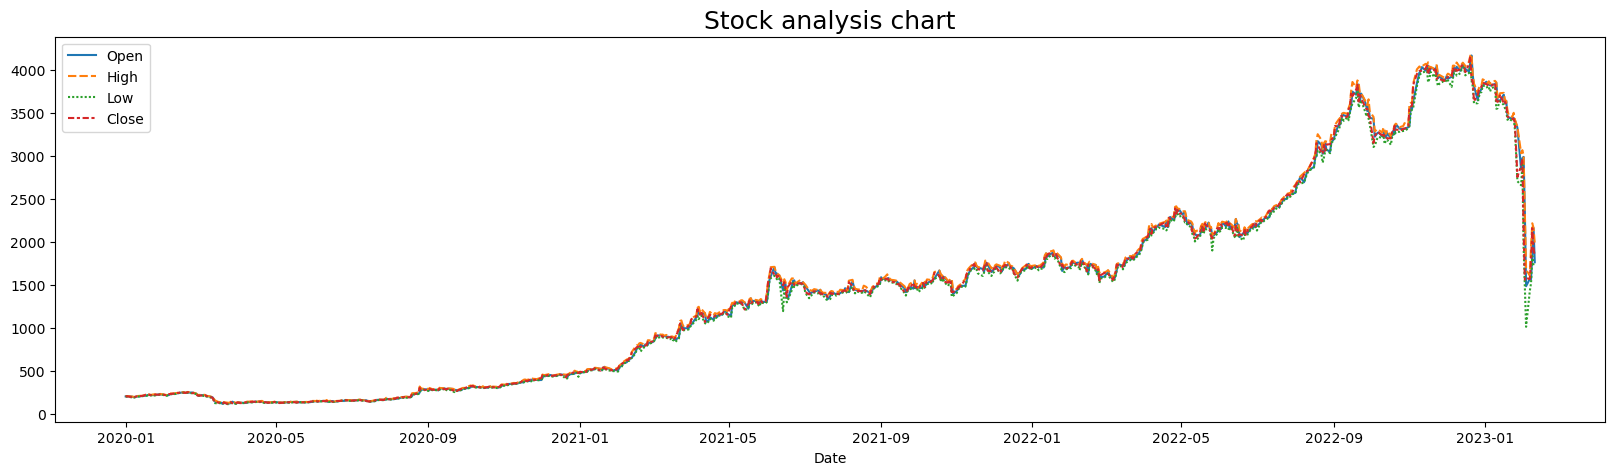

In [74]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[['Open','High','Low','Close']])
plt.title("Stock analysis chart",fontsize=18)

In [75]:
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (776, 2)


Text(0.5, 1.0, 'Stock close price chart')

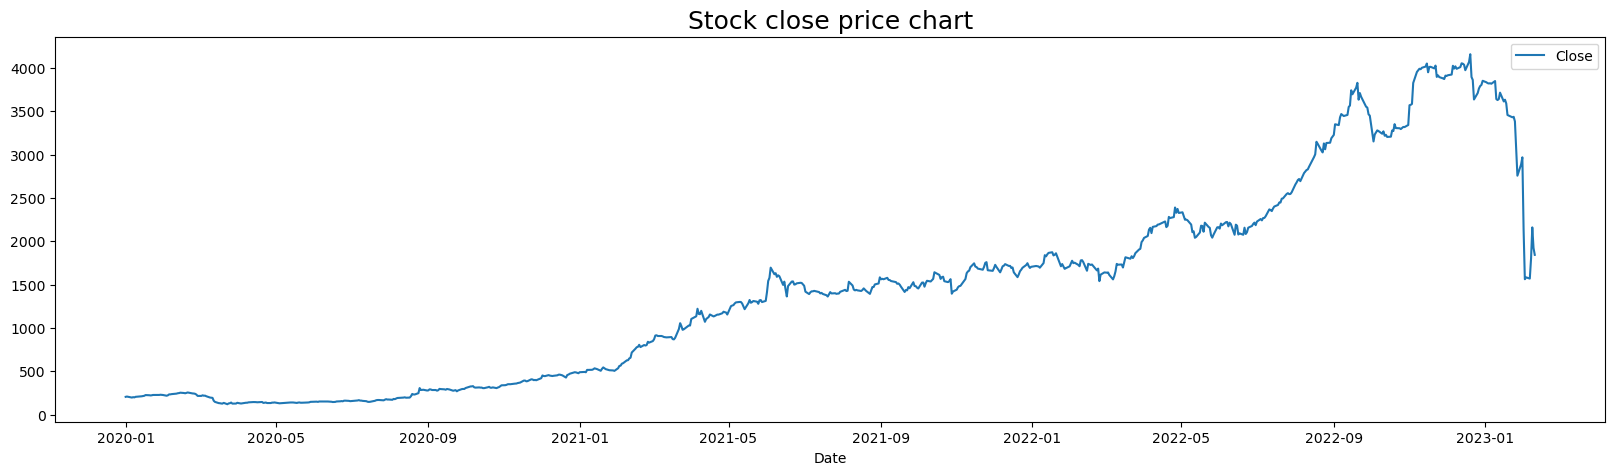

In [76]:
plt.figure(figsize=(20,5))
sns.lineplot(data=closedf)
plt.title("Stock close price chart",fontsize=18)

## **Model Creation**

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

#### **Evaluation Metrics**
**mean_squared_error:**
* This is a metric that measures the average squared difference between the predicted and actual values. It is calculated as the mean of the squared differences between the predicted and actual values. This metric is useful for penalizing large errors in the predictions, and is commonly used as a loss function during training. However, it can be sensitive to outliers and does not provide an easily interpretable measure of error in the original units of the response variable.

**mean_absolute_error:** 
* This is a metric that measures the average absolute difference between the predicted and actual values. It is calculated as the mean of the absolute differences between the predicted and actual values. This metric provides an easily interpretable measure of error in the original units of the response variable, and is less sensitive to outliers than the mean squared error.

**explained_variance_score:** 
* This is a metric that measures the proportion of variance in the target variable that is explained by the model. It is calculated as 1 - (variance of residuals / variance of target variable). This metric provides an indication of how well the model fits the data and can be interpreted as the amount of information captured by the model.

**r2_score:**
* This is a metric that measures the proportion of variance in the target variable that is explained by the model, normalized by the total variance in the target variable. It is calculated as 1 - (sum of squared residuals / total sum of squares). This metric provides a normalized indication of how well the model fits the data, and can be interpreted as the percentage of variance in the target variable that is explained by the model. It ranges from 0 to 1, with 1 indicating a perfect fit and values close to 0 indicating poor performance.

**mean_poisson_deviance:**
* It is a metric that measures the goodness of fit of a Poisson regression model. It compares the predicted values of the model with the observed values and calculates the mean deviation of the predicted values from the observed values. A lower value of this metric indicates a better fit of the model to the data.

**mean_gamma_deviance:**
* It is a metric that measures the goodness of fit of a Gamma regression model. It compares the predicted values of the model with the observed values and calculates the mean deviation of the predicted values from the observed values. A lower value of this metric indicates a better fit of the model to the data.

**accuracy_score:**
* It is a metric used to evaluate the performance of a classification model. It calculates the proportion of correctly predicted labels to the total number of samples. A higher value of this metric indicates a better classification performance of the model.



In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

#### **Scaling**
**MinMaxScaler:**
* MinMaxScaler is a technique used in data preprocessing to scale and transform features or variables of a dataset to a particular range, usually between 0 and 1. This technique helps to normalize the data and make it more consistent, making it easier to compare and analyze the data.
* MinMaxScaler is a simple linear scaling technique that works by subtracting the minimum value of the feature and then dividing by the range (i.e., the difference between the maximum and minimum values) of the feature. The resulting values are then rescaled to fit within the desired range.
* MinMaxScaler is commonly used in machine learning algorithms, especially in algorithms that involve distance calculations or optimization, such as clustering, gradient descent, and neural networks. It helps to improve the performance of the algorithms by reducing the influence of the scale of the variables on the model.

In [79]:
close_stock = closedf.copy()
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(776, 1)


In [80]:
training_size=int(len(closedf)*0.75)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
# print(train_data)
# print(test_data)

train_data:  (582, 1)
test_data:  (194, 1)


In [81]:
# convert an array of values into a dataset matrix
"""
This function creates a sliding window of size time_step over the input dataset and constructs a set of input-output pairs for training a time series forecasting model. 
The input matrix dataX contains n rows, where n is the number of time steps in the input sequence, and time_step columns, representing the past time_step values of the 
input sequence. The output matrix dataY contains n rows and 1 column,representing the next value in the sequence to be predicted.
"""
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [82]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (566, 15)
y_train:  (566,)
X_test:  (178, 15)
y_test (178,)


### **Support Vector Regressor**
* Support Vector Regressor (SVR) is a machine learning algorithm used for regression analysis. It is an extension of the popular Support Vector Machine (SVM) algorithm used for classification problems.

* SVR tries to fit a line or a curve through the data points in such a way that the margin between the predicted values and the actual values is minimized. The algorithm does this by identifying the support vectors, which are the data points closest to the line or curve being fitted, and using them to optimize the margin.

* SVR is particularly useful when dealing with nonlinear data, as it is able to transform the data into a higher dimensional space, where it can be more easily separated. It is also highly effective in dealing with noisy data, as it is able to effectively filter out the noise and identify the underlying trends in the data.

* In summary, SVR is a powerful regression algorithm that is highly effective in dealing with nonlinear and noisy data, making it a valuable tool for data scientists and machine learning practitioners.






In [83]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel= 'rbf', C= 1e2, gamma= 0.1)
svr_rbf.fit(X_train, y_train)

SVR(C=100.0, gamma=0.1)

In [84]:
# Lets Do the prediction 

train_predict =svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

print(train_predict.shape)
print(test_predict.shape)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

(566,)
(178,)
Train data prediction: (566, 1)
Test data prediction: (178, 1)


In [85]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
print(train_predict.shape)
print(test_predict.shape)
# print(train_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 
print(original_ytrain.shape)
print(original_ytest.shape)

(566, 1)
(178, 1)
(566, 1)
(178, 1)


In [86]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  223.34570215906888
Train data MSE:  49883.3026729275
Test data MAE:  182.34884551645285
---------------------------------------------------------------------------------------------------------
Test data RMSE:  1018.2520556359691
Test data MSE:  1036837.2488068767
Test data MAE:  891.5475564356086
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9202735997880089
Test data explained variance regression score: 0.3670143127977672
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.889758202622829
Test data R2 score: -1.1377736703006778
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.2802321975560743
Test data M

Text(0.5, 1.0, 'Stock close price chart')

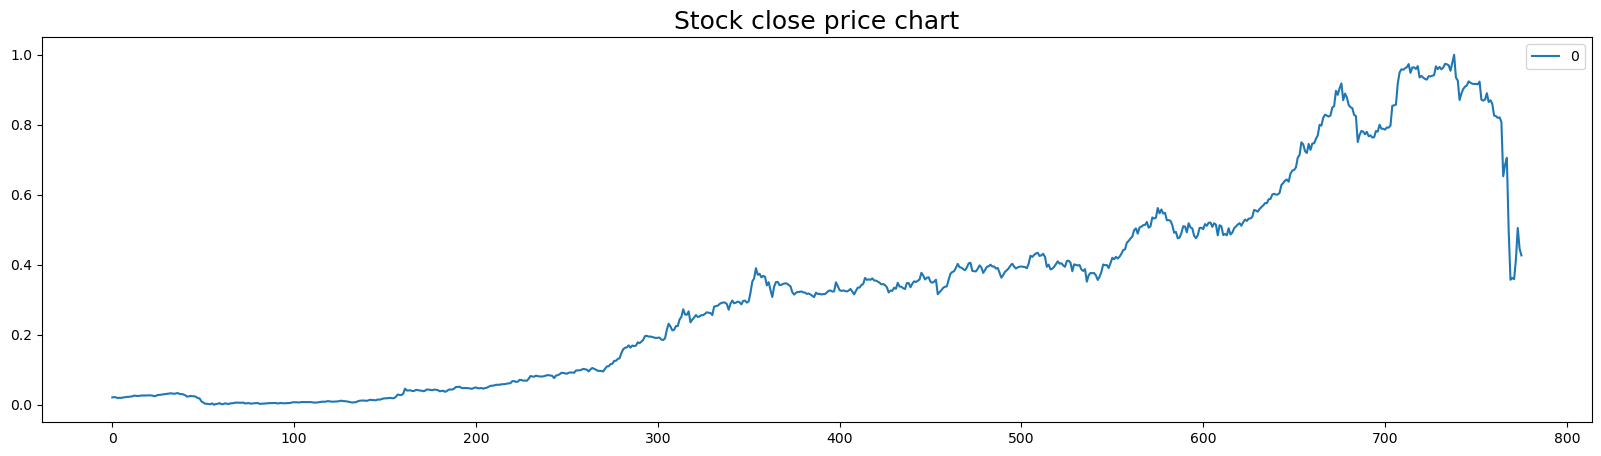

In [87]:
plt.figure(figsize=(20,5))
sns.lineplot(data=closedf)
plt.title("Stock close price chart",fontsize=18)

Train predicted data:  (776, 1)
Test predicted data:  (776, 1)


Text(0.5, 1.0, 'Stock close price chart')

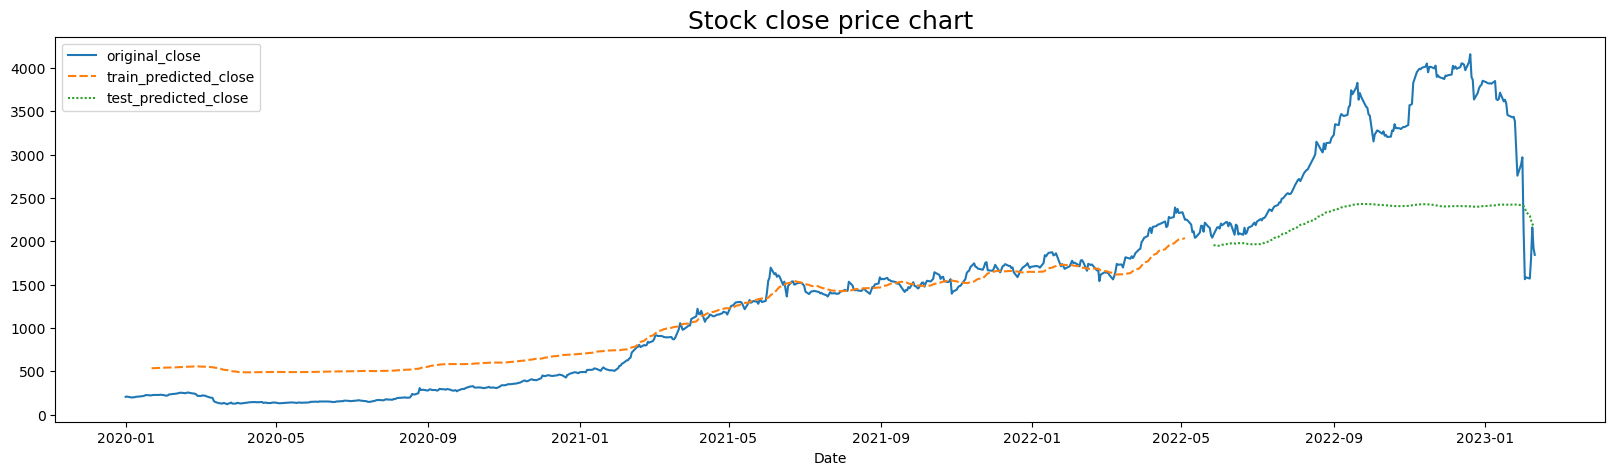

In [88]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Stock close price chart",fontsize=18)

In [89]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8246633951164437,
 0.8197684495129813,
 0.8211648831600996,
 0.808049796229629,
 0.6529020565208994,
 0.6853889463858612,
 0.7054292547897179,
 0.49810094927776655,
 0.35714533308903995,
 0.36247356927449825,
 0.3589874370490683,
 0.41591439168478234,
 0.5052465299614246,
 0.4462645399939587,
 0.4267936992121539]

In [90]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8246633951164437,
 0.8197684495129813,
 0.8211648831600996,
 0.808049796229629,
 0.6529020565208994,
 0.6853889463858612,
 0.7054292547897179,
 0.49810094927776655,
 0.35714533308903995,
 0.36247356927449825,
 0.3589874370490683,
 0.41591439168478234,
 0.5052465299614246,
 0.4462645399939587,
 0.4267936992121539]

In [91]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

Output of predicted next days:  10
Output of predicted next days:  [0.48610097412827913, 0.47599284612401677, 0.465346945943077, 0.45460069004153625, 0.4426941902867608, 0.4341888144806247, 0.42462703706951405, 0.4138799682200373, 0.4102195133110237, 0.4126203959418548]


In [92]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

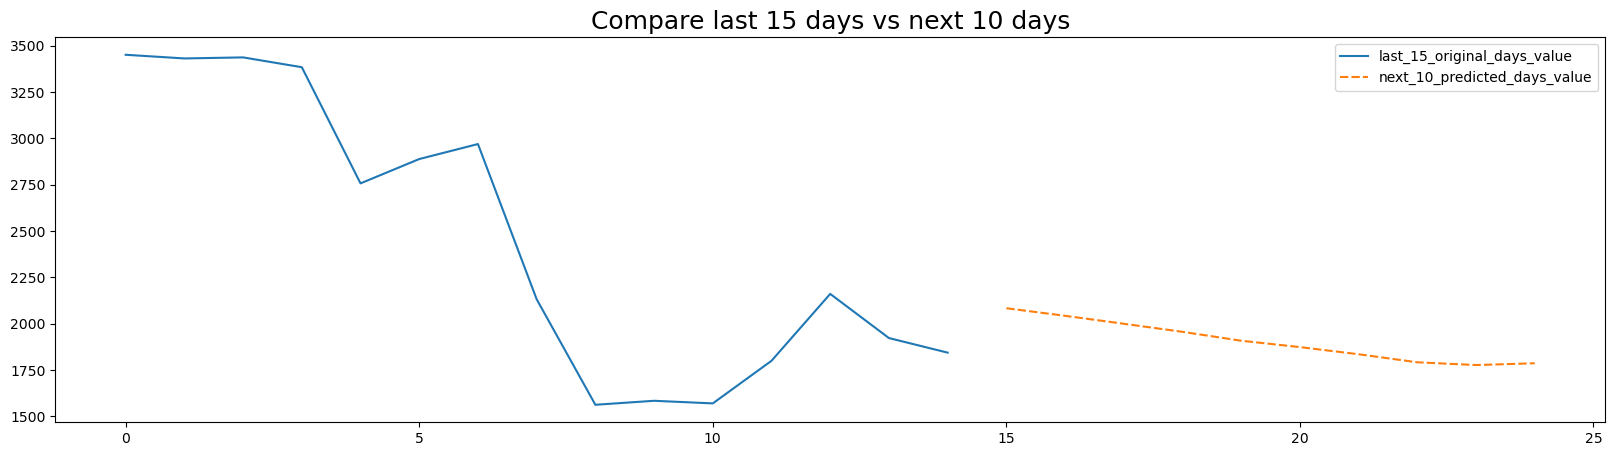

In [93]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})


plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

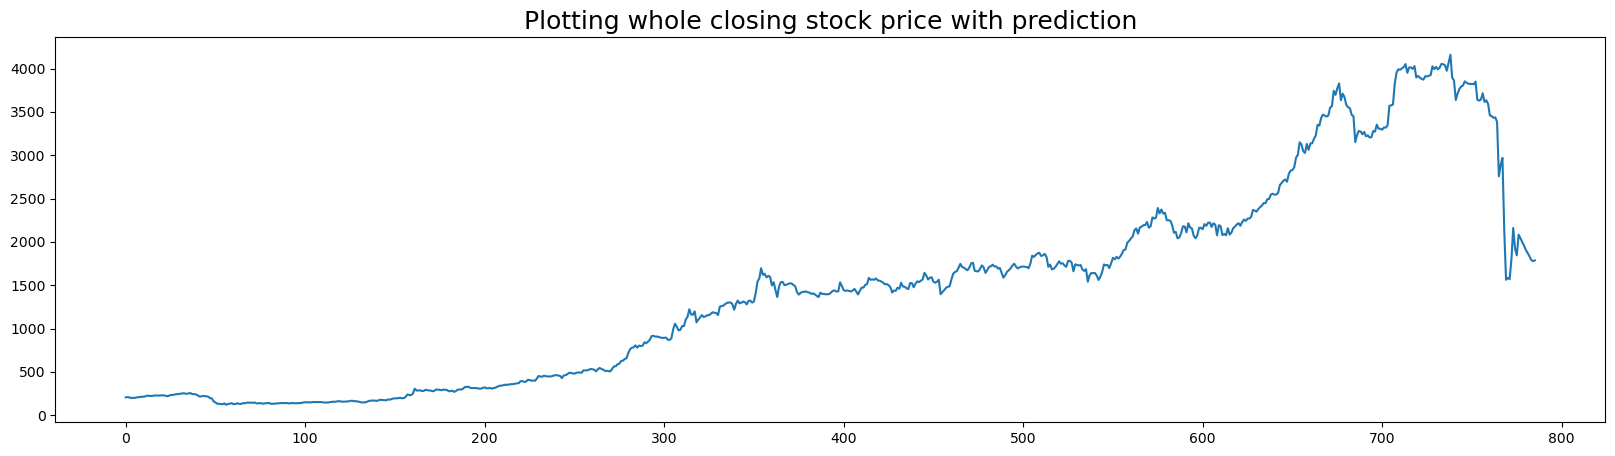

In [94]:
# Creating list of close price
svrdf=closedf.tolist()
# Adding next 10 days prediction
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

plt.figure(figsize=(20,5))
sns.lineplot(data=svrdf)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

### **Random Forest Regressor**
* Random Forest Regressor is a popular machine learning algorithm that is widely used for solving regression problems. This algorithm is based on the concept of decision trees and ensemble learning. The Random Forest Regressor algorithm involves creating a large number of decision trees, and then combining the results of each tree to produce a final prediction.

* In this algorithm, each decision tree is trained on a randomly selected subset of the data, which helps to prevent overfitting. The final prediction is then made by aggregating the predictions of all the decision trees. This technique helps to improve the accuracy and stability of the model by reducing the impact of individual decision trees.

* Random Forest Regressor is highly flexible and can be used to solve a wide range of regression problems. It is also easy to use and implement, making it a popular choice among data scientists and machine learning practitioners. Overall, Random Forest Regressor is a powerful tool for solving complex regression problems, and it can provide highly accurate predictions in a variety of contexts.





In [95]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [96]:
# Lets Do the prediction 

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (566, 1)
Test data prediction: (178, 1)


In [97]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [98]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  13.648264905487158
Train data MSE:  186.27513493035238
Test data MAE:  8.132275265017652
---------------------------------------------------------------------------------------------------------
Test data RMSE:  1056.365834158519
Test data MSE:  1115908.7755774236
Test data MAE:  876.601951685393
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9995887780658542
Test data explained variance regression score: 0.11255825313765966
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9995883330777827
Test data R2 score: -1.3008050700647842
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.0001856254603912905
Test da

Train predicted data:  (776, 1)
Test predicted data:  (776, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price')

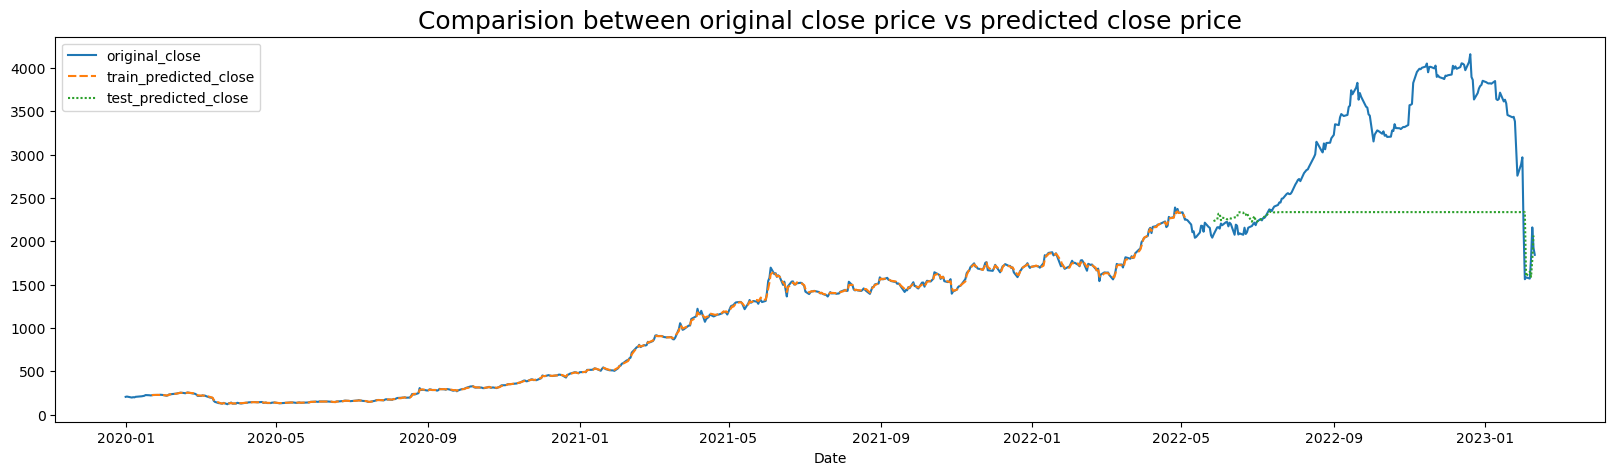

In [99]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price",fontsize=18)

In [100]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = regressor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

Output of predicted next days:  10
Output of predicted next days:  [0.4779279796774336, 0.48102692343879205, 0.49656898233659974, 0.5146330895351655, 0.5095767122405825, 0.5057211688446734, 0.4992755629063643, 0.49964487503899574, 0.5049506296331139, 0.5151942132185813]


In [101]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

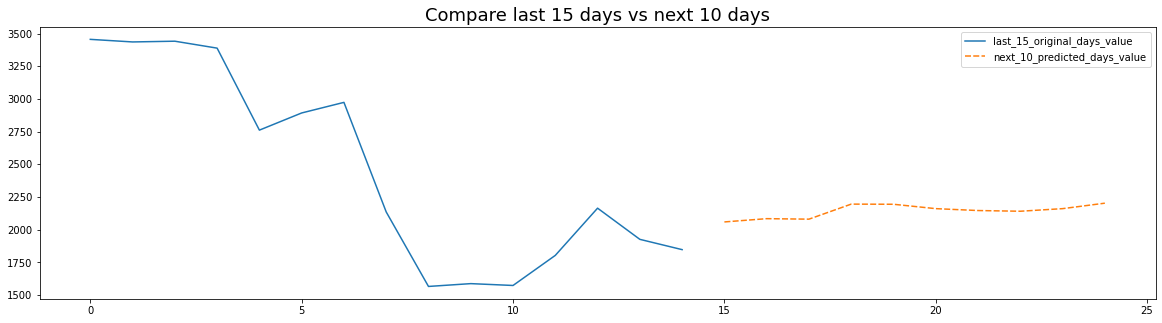

In [52]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})

plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

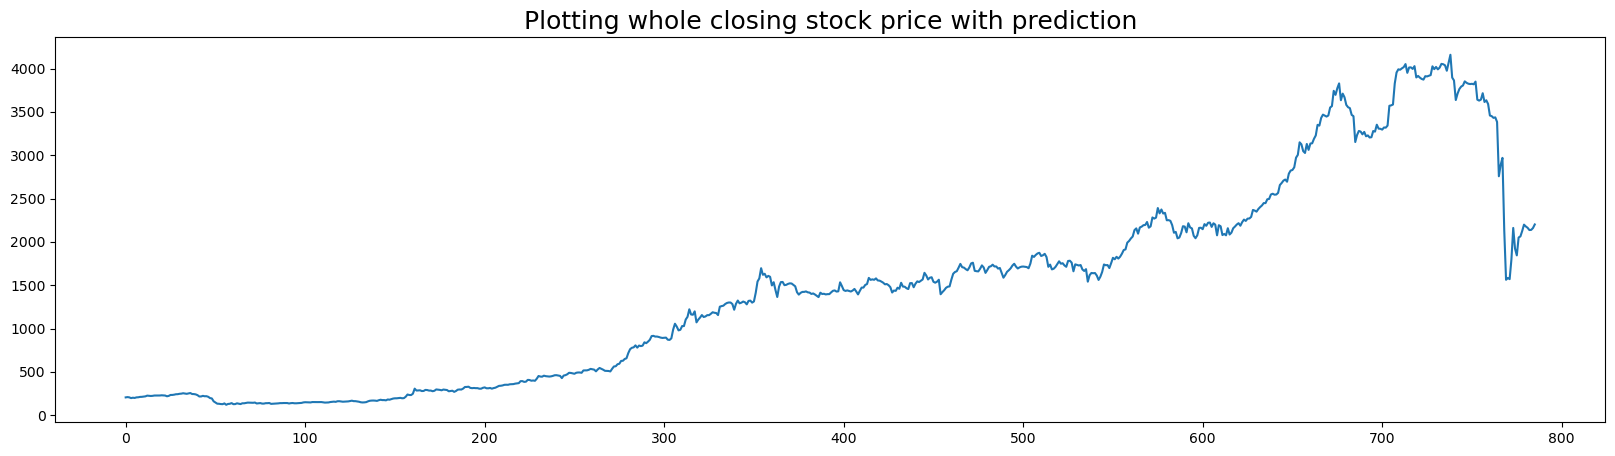

In [102]:
# Creating list of close price
rfdf=closedf.tolist()
# Adding next 10 days prediction
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

plt.figure(figsize=(20,5))
sns.lineplot(data=rfdf)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

### **K Nearest Neighbors (KNN)**
* K Nearest Neighbors (KNN) is a type of non-parametric algorithm used for regression and classification problems. The KNN regression algorithm is called the K Neighbors Regressor.

* In KNN regression, the prediction for a new data point is based on the K-nearest neighbors of that data point in the training dataset. The K neighbors are the K training data points that are closest to the new data point based on some distance metric, such as Euclidean distance. The prediction for the new data point is then computed as the average of the output values of the K nearest neighbors.

* KNN regression can be useful when there is no clear functional relationship between the input and output variables, and the data has complex patterns that are difficult to model with linear regression or other parametric models. However, KNN regression can be sensitive to outliers, and the choice of the value of K can have a significant impact on the accuracy of the predictions.






In [103]:
from sklearn import neighbors
K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [104]:
# Lets Do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (566, 1)
Test data prediction: (178, 1)


In [105]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [106]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  42.184172587789035
Train data MSE:  1779.5044169163718
Test data MAE:  26.90040871613663
---------------------------------------------------------------------------------------------------------
Test data RMSE:  1116.7683010649628
Test data MSE:  1247171.4382635234
Test data MAE:  938.7843108614233
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9961496299903414
Test data explained variance regression score: 0.0007427812026711278
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9960673059951994
Test data R2 score: -1.5714452930185892
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.0024846693622266676
Tes

Train predicted data:  (776, 1)
Test predicted data:  (776, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price')

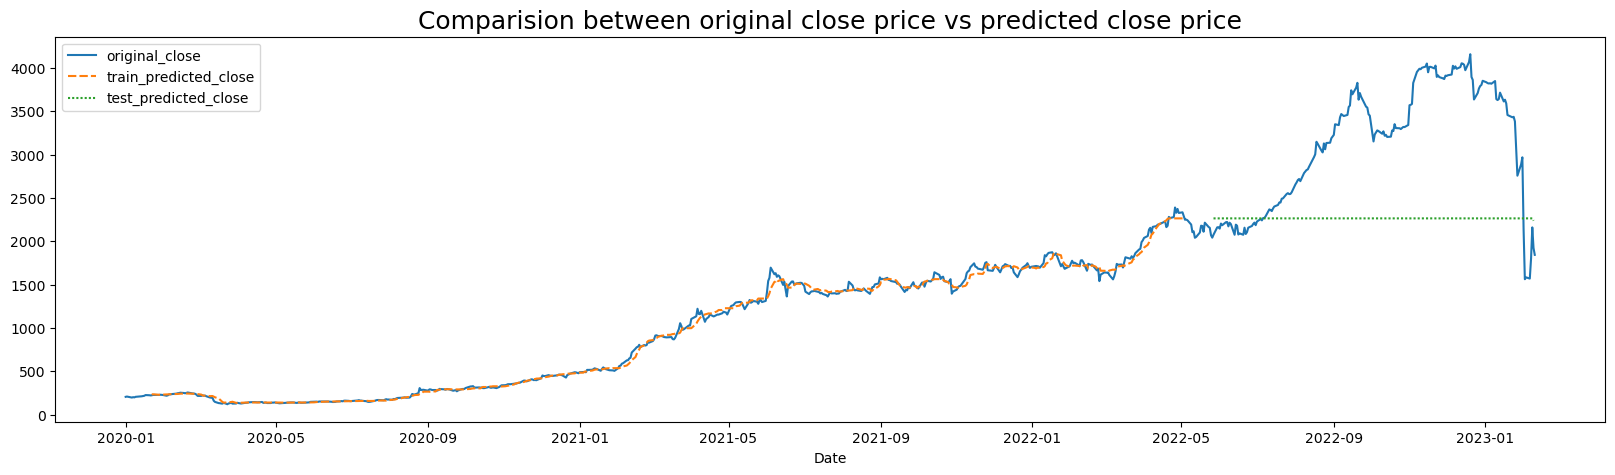

In [107]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price",fontsize=18)

In [108]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = neighbor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

Output of predicted next days:  10
Output of predicted next days:  [0.5166840808214858, 0.5089791013635859, 0.5163537896006958, 0.5308331228779077, 0.5289030402968493, 0.5282951129774243, 0.5256588905450218, 0.50867852149699, 0.5144724006278999, 0.518892129627337]


In [109]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

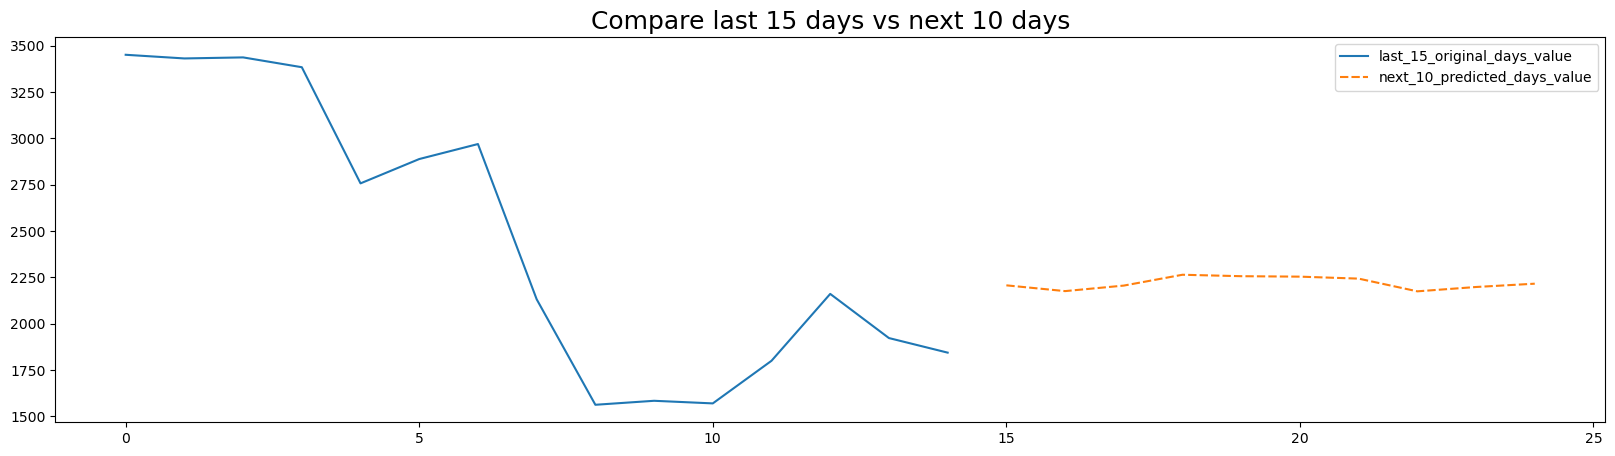

In [110]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})

plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

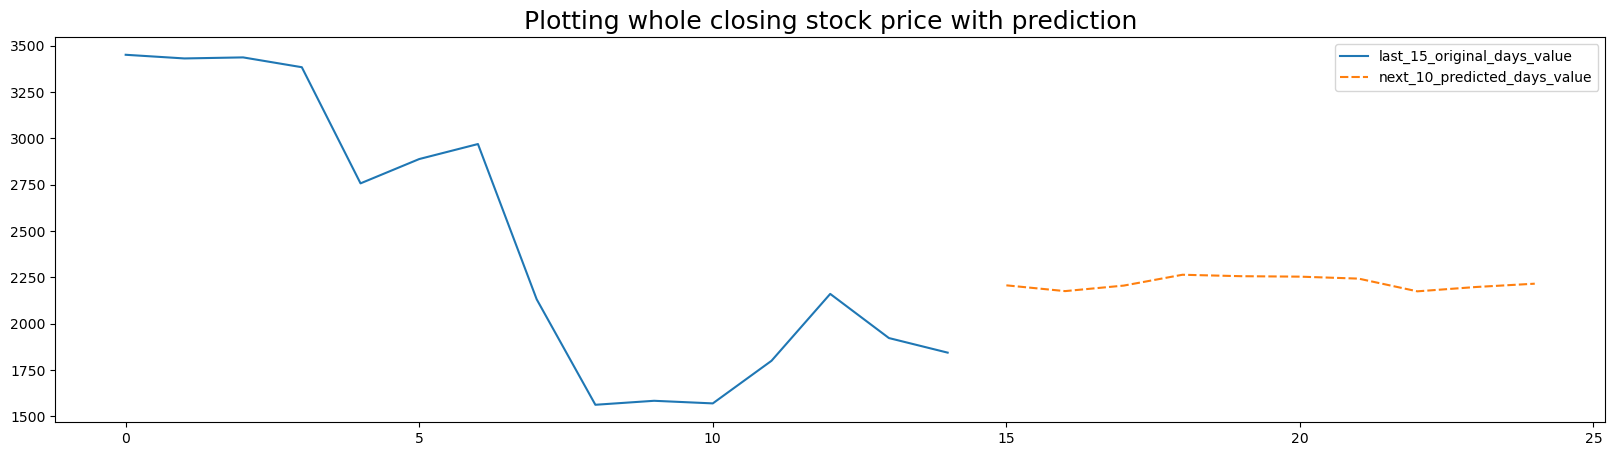

In [111]:
# Creating list of close price
knndf=closedf.tolist()
# Adding next 10 days prediction
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

### **Long short-term memory (LSTM)**

* LSTM (Long Short-Term Memory) is a deep learning model that is commonly used in the field of natural language processing,time series forecasting, speech recognition, and image classification. It is a type of recurrent neural network (RNN) that is designed to address the vanishing gradient problem, which occurs when RNNs are unable to effectively propagate error gradients over time.

* LSTM has the ability to selectively remember or forget previous inputs based on their relevance to the current output, allowing it to maintain long-term dependencies in sequential data. It consists of a memory cell, an input gate, an output gate, and a forget gate, each of which controls the flow of information within the network.

* The LSTM model has proven to be effective in a variety of applications, including language translation, sentiment analysis, and speech recognition. It has also been used in predictive maintenance, financial forecasting, and other areas that involve time-series data.

* Overall, LSTM is a powerful deep learning model that is well-suited for tasks that involve sequential data and long-term dependencies.

In [112]:
# reshape input to be [samples, time steps, features] which is required for LSTM
# LSTM requies 3-dimensional input
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (566, 15, 1)
X_test:  (178, 15, 1)


#### **Sequential Model**

* In deep learning, a sequential model is a type of **neural network architecture** in which the layers are arranged sequentially, or one after the other, **with no branching**. This means that the output of each layer is fed as input to the next layer, in a chain-like sequence.

* The sequential model is a popular choice for many deep learning applications, as it is simple and easy to use. However, it may not be appropriate for all types of problems, such as those that require more complex network architectures with multiple inputs or outputs. In those cases, other types of neural network architectures, such as recurrent neural networks or convolutional neural networks, may be more appropriate.

**1.Input shape:** This parameter defines the shape of the input data that is fed to the LSTM network. In Keras, the input shape is specified as a tuple that contains the number of time steps in the sequence and the number of input features in each time step.

**2.Number of hidden units:** This parameter determines the number of hidden units in the LSTM layer. More hidden units generally allow the network to capture more complex patterns in the input data, but also require more computational resources.

**3.Activation function:** This parameter determines the activation function used in the LSTM layer. The most commonly used activation functions in LSTM are the hyperbolic tangent (tanh) function and the sigmoid function. The activation function is used to control the output of the LSTM cell and can help to prevent vanishing or exploding gradients during training.

**4.Dropout:** This parameter is used to prevent overfitting in the LSTM network by randomly dropping out some of the LSTM units during training.

**5.Recurrent dropout:** This parameter is similar to the dropout parameter, but is used to randomly drop out some of the connections between the LSTM cells during training.

**6.Number of time steps:** This parameter determines the number of time steps in the input sequence. In many applications, the number of time steps is fixed, but it can also be variable.

**7.Batch size:** This parameter determines the number of samples in each training batch. A larger batch size can help to speed up training, but can also require more memory.

**8.Learning rate:** This parameter determines the step size used in the optimization algorithm during training. A smaller learning rate can help to prevent overshooting the optimal solution, but can also make the training process slower.

In [113]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [114]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21025 (82.13 KB)
Trainable params: 21025 (82.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### **Epochs**
An epoch is a complete pass through the training data during the training of a model. During each epoch, the model processes every sample in the training dataset, updates its parameters (weights and biases), and tries to minimize the loss function.

In [115]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)

Epoch 1/10

114/114 [==============================] - 9s 28ms/step - loss: 0.0041 - val_loss: 0.0085
Epoch 2/10
114/114 [==============================] - 2s 15ms/step - loss: 5.5050e-04 - val_loss: 0.0082
Epoch 3/10
114/114 [==============================] - 2s 16ms/step - loss: 4.6399e-04 - val_loss: 0.0087
Epoch 4/10
114/114 [==============================] - 2s 16ms/step - loss: 4.5784e-04 - val_loss: 0.0097
Epoch 5/10
114/114 [==============================] - 2s 16ms/step - loss: 4.3832e-04 - val_loss: 0.0083
Epoch 6/10
114/114 [==============================] - 2s 16ms/step - loss: 6.0075e-04 - val_loss: 0.0122
Epoch 7/10
114/114 [==============================] - 2s 17ms/step - loss: 3.9398e-04 - val_loss: 0.0076
Epoch 8/10
114/114 [==============================] - 2s 17ms/step - loss: 6.2878e-04 - val_loss: 0.0071
Epoch 9/10
114/114 [==============================] - 2s 17ms/step - loss: 3.9620e-04 - val_loss: 0.0092
Epoch 10/10
114/114 [==============================] - 2s 

In [116]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

6/6 [==============================] - 0s 7ms/step


((566, 1), (178, 1))

In [117]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [118]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  151.958841929828
Train data MSE:  23091.48964065445
Test data MAE:  131.75075477411386
---------------------------------------------------------------------------------------------------------
Test data RMSE:  333.388315708063
Test data MSE:  111147.76905065909
Test data MAE:  202.62876585542483
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9859795461472688
Test data explained variance regression score: 0.7759688977642536
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9489679474754659
Test data R2 score: 0.7708331037850117
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.06154955596963972
Test data MG

Train predicted data:  (776, 1)
Test predicted data:  (776, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price')

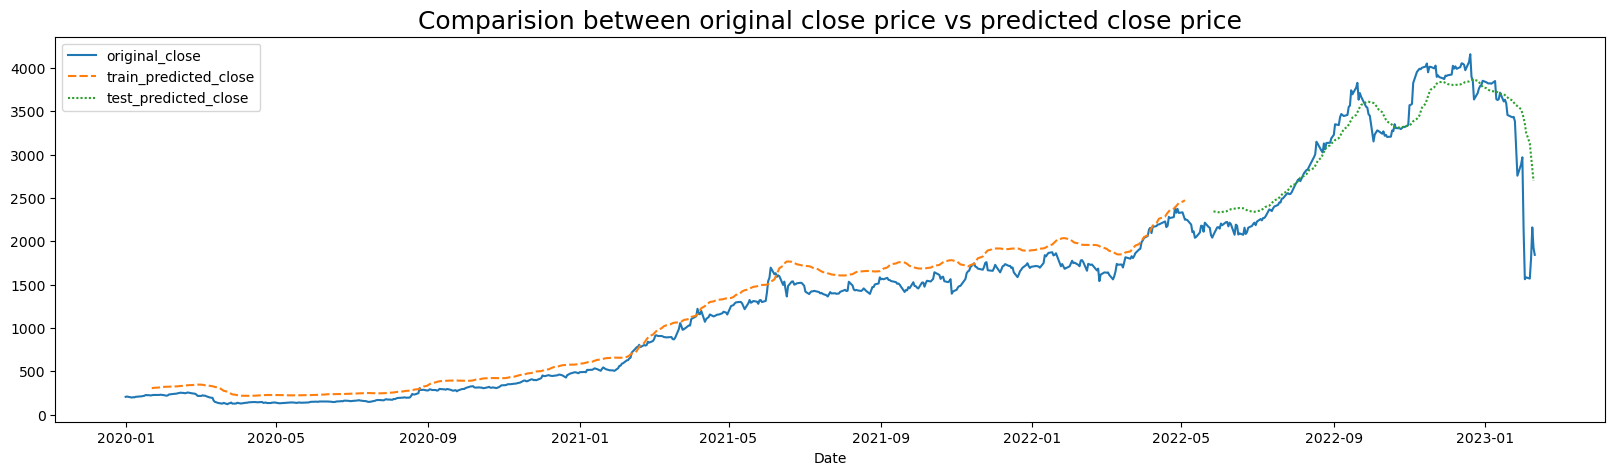

In [119]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price",fontsize=18)

In [120]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array
lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(np.expand_dims(x_input, 2))
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0])
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = model.predict(np.expand_dims(x_input, 2))
        temp_input.extend(yhat[0])
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

1/1 [==============================] - 0s 24ms/step
Output of predicted next days:  10
Output of predicted next days:  [[0.5808935761451721], [0.5609972476959229], [0.5478807091712952], [0.5402953028678894], [0.5371333360671997], [0.5399394035339355], [0.5433209538459778], [0.5470985770225525], [0.5556288361549377], [0.566361129283905]]


In [121]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

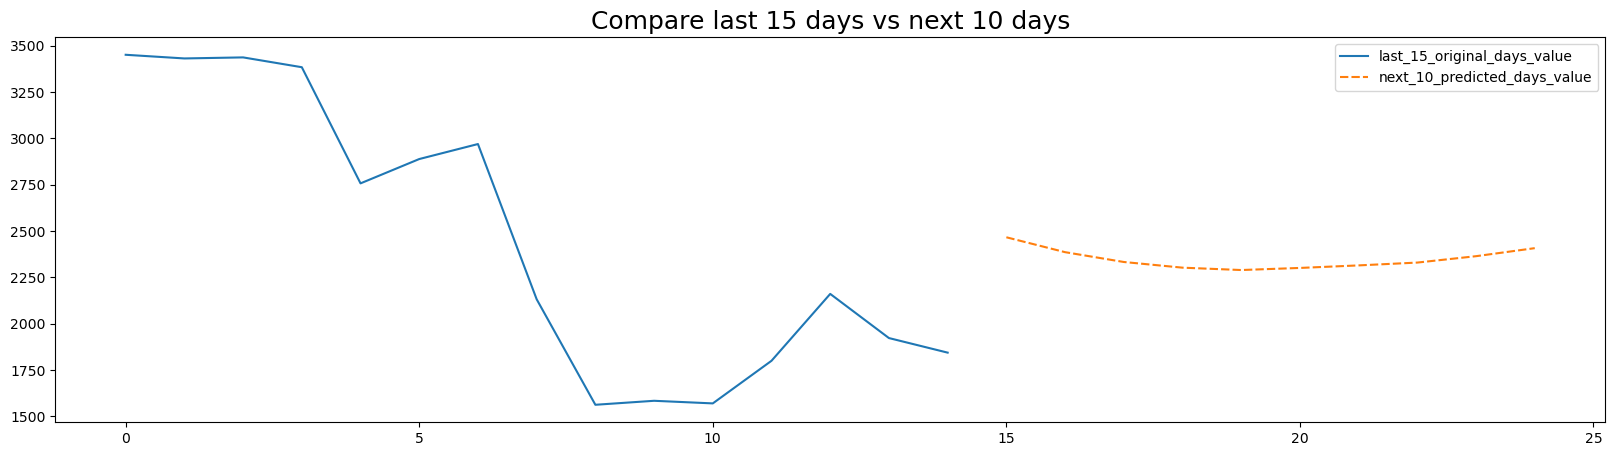

In [122]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})

plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

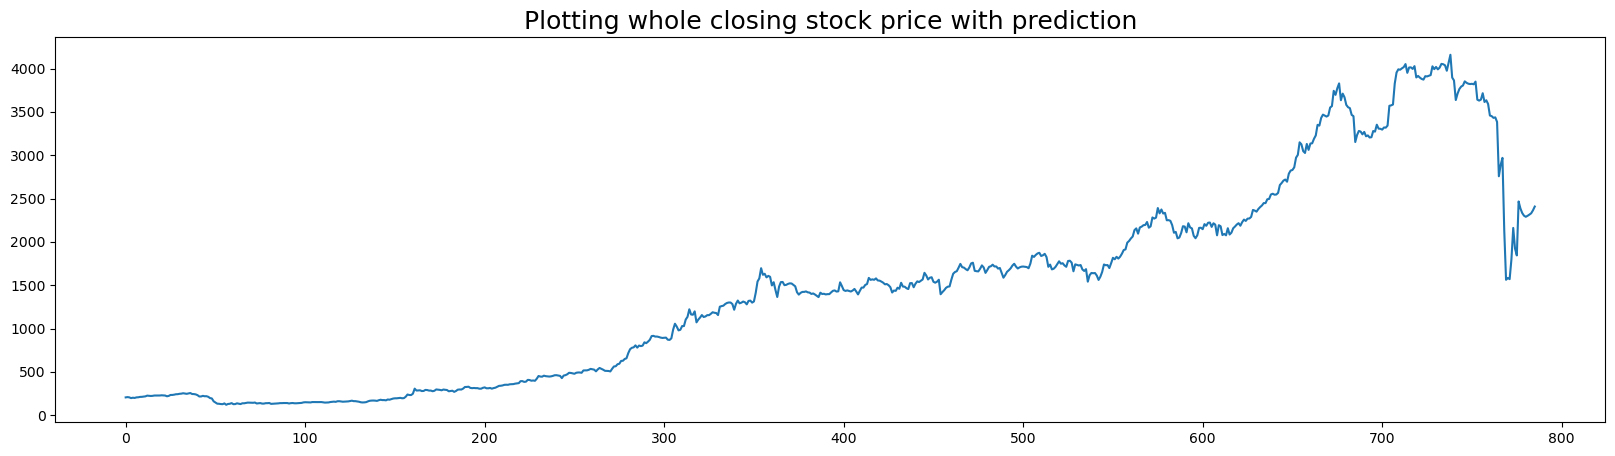

In [123]:
# Creating list of close price
lstmdf=closedf.tolist()
# Adding next 10 days prediction
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

plt.figure(figsize=(20,5))
sns.lineplot(data=lstmdf)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

####**Save and load model**
**Hierarchical Data Format version 5**

*The HDF5 (Hierarchical Data Format version 5),  format is designed to store large and complex datasets, and it provides a way to store and organize data in a hierarchical structure. In the context of deep learning, the .h5 file contains the weights and architecture of the trained model, along with any other relevant information such as the optimizer state and the training configuration.*

In [124]:
model.save('lstm_model.h5')
lstm_model = tf.keras.models.load_model('lstm_model.h5')

In [125]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21025 (82.13 KB)
Trainable params: 21025 (82.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **GRU**
* The GRU (Gated Recurrent Unit) Deep Learning model is a type of artificial neural network that is used for sequence data processing. 
* This model is similar to the LSTM (Long Short-Term Memory) model and is designed to overcome some of the issues associated with LSTM. 
* GRU networks have fewer parameters than LSTM networks, which makes them faster to train and more memory-efficient. 
* The main difference between the two models is that GRU has fewer gates to control the flow of information and therefore, it is less prone to overfitting. 
* The GRU model is widely used in various applications, such as natural language processing, speech recognition, image recognition, and music analysis. 
* It is capable of learning long-term dependencies in the data and can model sequences with arbitrary lengths. In conclusion, the GRU Deep Learning model is a powerful tool for processing sequence data and has proven to be effective in various real-world applications.

In [126]:
# reshape input to be [samples, time steps, features] which is required for LSTM
#  GRU requires 3-Dimensional input
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (566, 15, 1)
X_test:  (178, 15, 1)


In [127]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [128]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22401 (87.50 KB)
Trainable params: 22401 (87.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [130]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)

Epoch 1/10
114/114 [==============================] - 3s 27ms/step - loss: 2.1494e-04 - val_loss: 0.0023
Epoch 2/10
114/114 [==============================] - 3s 24ms/step - loss: 2.0970e-04 - val_loss: 0.0024
Epoch 3/10
114/114 [==============================] - 3s 24ms/step - loss: 1.9001e-04 - val_loss: 0.0026
Epoch 4/10
114/114 [==============================] - 3s 25ms/step - loss: 1.5998e-04 - val_loss: 0.0019
Epoch 5/10
114/114 [==============================] - 3s 25ms/step - loss: 1.6456e-04 - val_loss: 0.0047
Epoch 6/10
114/114 [==============================] - 3s 27ms/step - loss: 1.2325e-04 - val_loss: 0.0013
Epoch 7/10
114/114 [==============================] - 3s 27ms/step - loss: 1.1992e-04 - val_loss: 0.0019
Epoch 8/10
114/114 [==============================] - 3s 29ms/step - loss: 1.7344e-04 - val_loss: 0.0012
Epoch 9/10
114/114 [==============================] - 4s 32ms/step - loss: 1.1422e-04 - val_loss: 0.0027
Epoch 10/10
114/114 [==============================] - 

In [131]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

6/6 [==============================] - 0s 10ms/step


((566, 1), (178, 1))

In [132]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [133]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  33.68281937848944
Train data MSE:  1134.5323212839437
Test data MAE:  21.56142519246563
---------------------------------------------------------------------------------------------------------
Test data RMSE:  171.64860878182057
Test data MSE:  29463.244896734494
Test data MAE:  133.49043887706284
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9975458454658453
Test data explained variance regression score: 0.9611666407473448
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9974926904278791
Test data R2 score: 0.9392520385872135
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.0018547522404112112
Test da

Train predicted data:  (776, 1)
Test predicted data:  (776, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price')

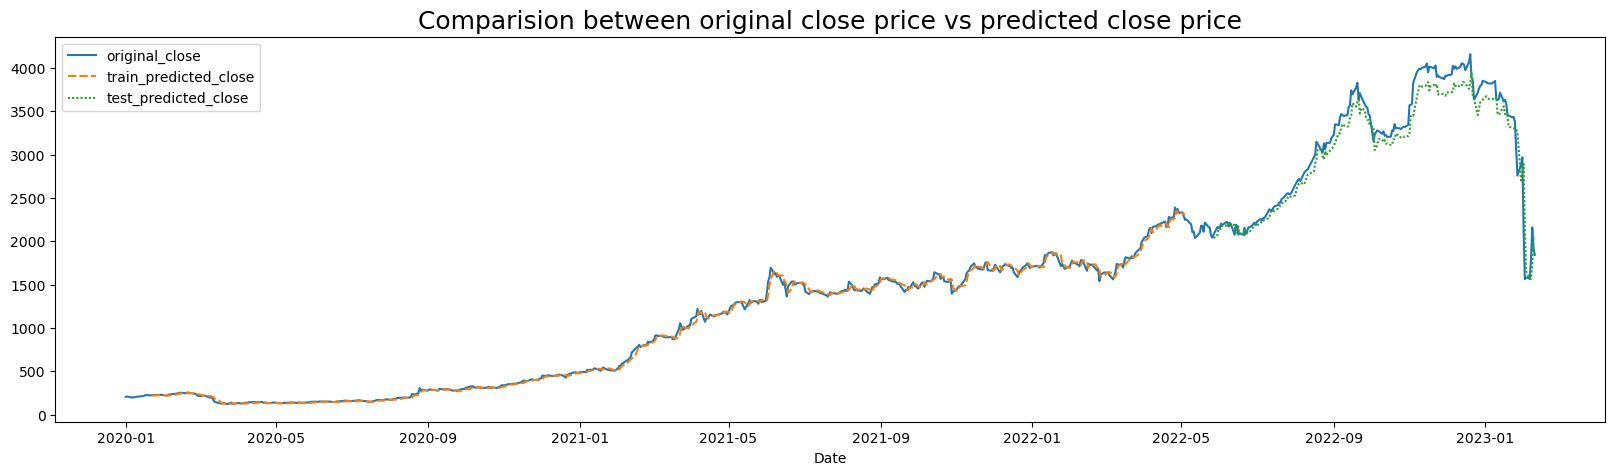

In [134]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price",fontsize=18)

In [135]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = model.predict(np.expand_dims(x_input, 2))
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0])
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = model.predict(np.expand_dims(x_input, 2))
        
        temp_input.extend(yhat[0])
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

1/1 [==============================] - 0s 25ms/step
Output of predicted next days:  10
Output of predicted next days:  [[0.4348169267177582], [0.43274977803230286], [0.4327055513858795], [0.4325750172138214], [0.43246498703956604], [0.4323745369911194], [0.43228697776794434], [0.4322044849395752], [0.4321308732032776], [0.432060569524765]]


In [136]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

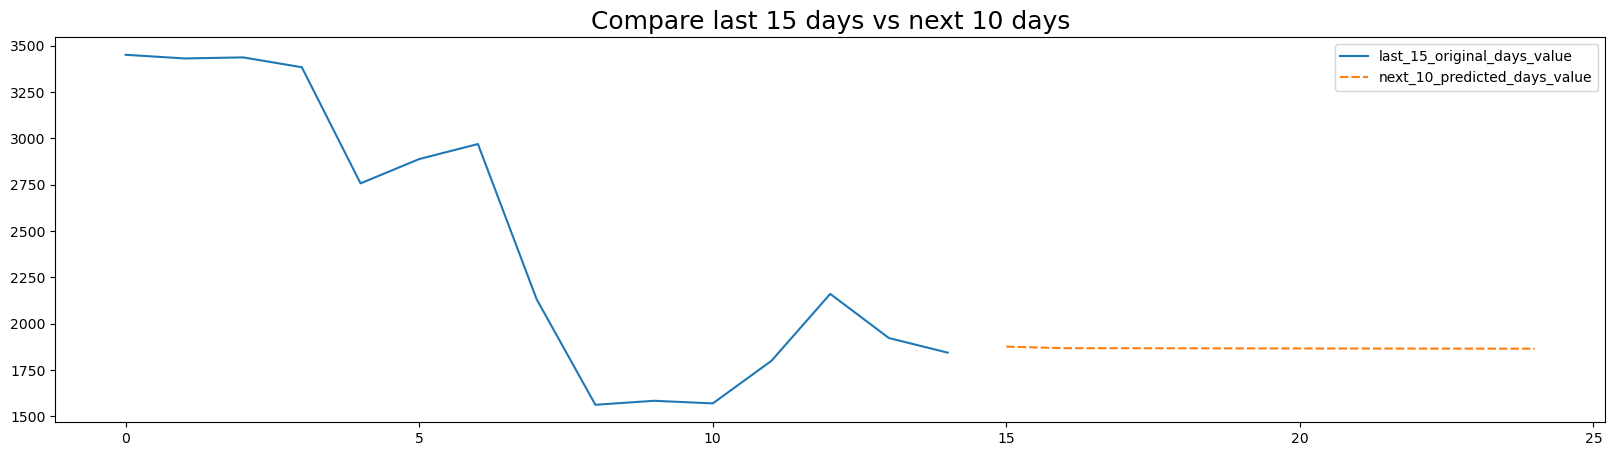

In [137]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})

plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

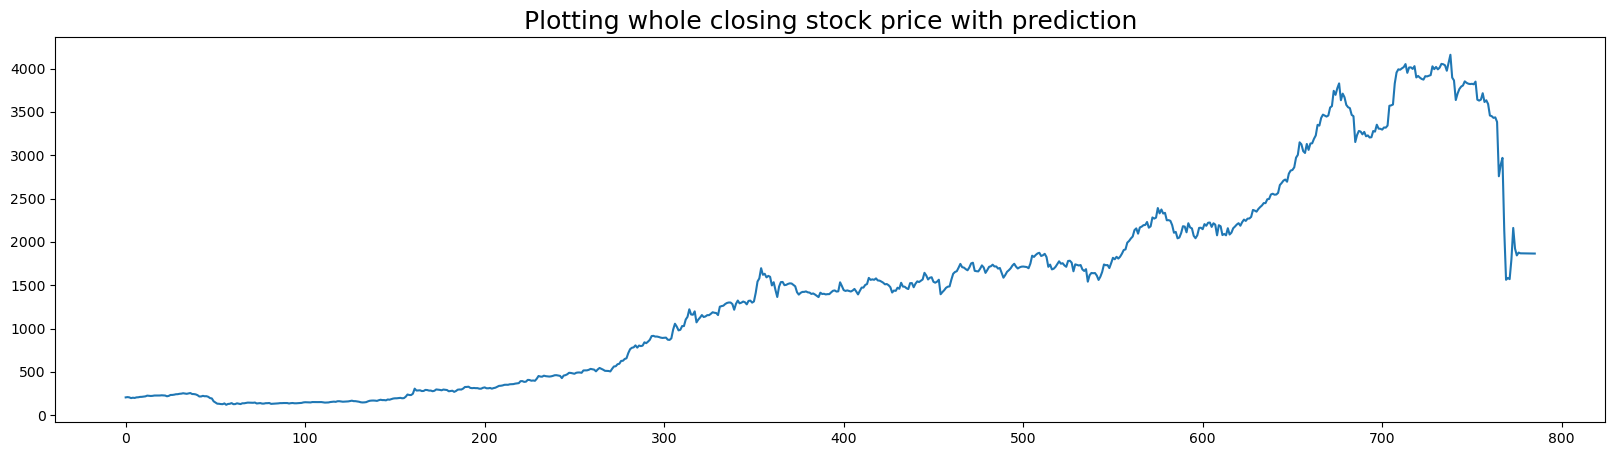

In [138]:
# Creating list of close price
grudf=closedf.tolist()
# Adding next 10 days prediction
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

plt.figure(figsize=(20,5))
sns.lineplot(data=grudf)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

In [139]:
model.save('gru_model.h5')
gru_model = tf.keras.models.load_model('gru_model.h5')

In [140]:
gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22401 (87.50 KB)
Trainable params: 22401 (87.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Yahoo finance github link and syntax:**
* https://github.com/ranaroussi/yfinance

```
import yfinance as yf

adanient = yf.Ticker("ADANIENT.NS")

# get all stock info (slow)
adanient.info
# fast access to subset of stock info (opportunistic)
# msft.fast_info

# get historical market data
# hist = msft.history(period="1mo")

# show meta information about the history (requires history() to be called first)
# msft.history_metadata

# show actions (dividends, splits, capital gains)
# msft.actions
# msft.dividends
# msft.splits
# msft.capital_gains  # only for mutual funds & etfs

# show share count
# - yearly summary:
# msft.shares
# - accurate time-series count:
# msft.get_shares_full(start="2022-01-01", end=None)

# show financials:
# - income statement
# msft.income_stmt
# msft.quarterly_income_stmt
# - balance sheet
# msft.balance_sheet
# msft.quarterly_balance_sheet
```

# **<center>THE END</center>**